# Basic Libraries and sql connection synatx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db= mysql.connector.connect(host='localHost',
    user='root',
    password='Pbhati@2002',
    database='ecommerce'
)
cur = db.cursor()


# Basic SQL Queries


## 1. List all unique cities where customers are located.


In [23]:
query=""" select distinct customer_city from customers """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## 2. Count the number of orders placed in 2017.


In [4]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
"total orders placed in 2017 are",data[0][0]


('total orders placed in 2017 are', 90202)

## 3. Find the total sales per category.


In [ ]:
query=""" select products.product_category category, sum(payments.payment_value) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
group by category
"""
cur.execute(query)
data=cur.fetchall()
data


## Agr upper vale data ka pandas ka use krke dataframe bnana ho


In [6]:
query=""" select products.product_category category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category
"""
cur.execute(query)
data=cur.fetchall()
data

df=pd.DataFrame(data,columns=["category", "sales"])
df


,category,sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


## 4. Calculate the percentage of orders that were paid in installments.


In [5]:
query=""" select (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 from payments  """
cur.execute(query)
data=cur.fetchall()
"the percentage of orders that were paid in installments is",data[0][0]


('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

## 5. Count the number of customers from each state.


<function matplotlib.pyplot.show(close=None, block=None)>

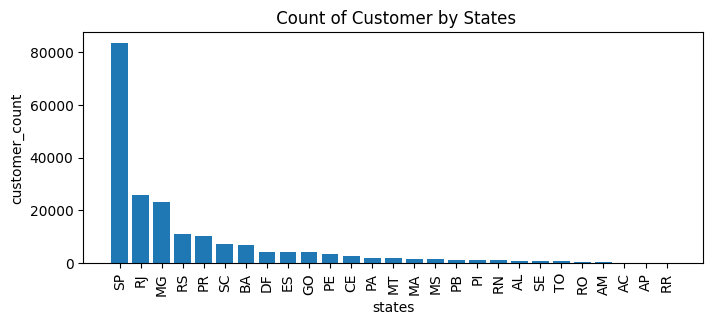

In [50]:
query=""" select customer_state, count(customer_id)
from customers group by customer_state
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["state", "customer_count"])
df=df.sort_values(by="customer_count", ascending=False)

plt.figure(figsize=(8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title(" Count of Customer by States")
plt.show


# Intermediate Queries


## 1. Calculate the number of orders per month in 2018.


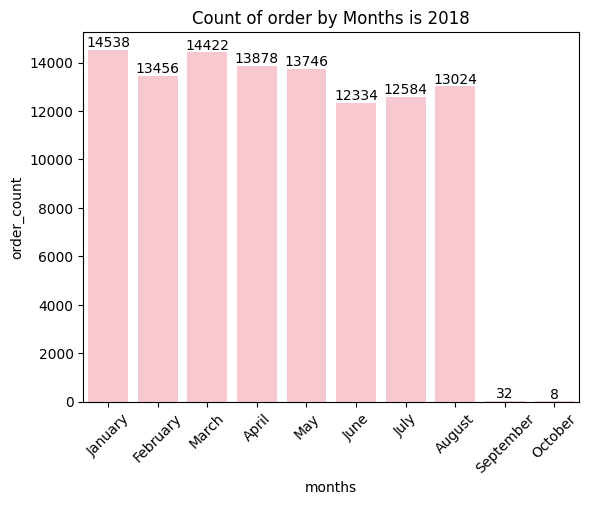

In [54]:
query= """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp)= 2018 
group by months
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["months", "order_count"])
o=['January','February','March','April','May','June','July','August','September','October']
ax=sns.barplot(x = df["months"], y= df["order_count"], data=df,order=o, color='pink')
plt.xticks(rotation=45)
plt.title("Count of order by Months is 2018")
ax.bar_label(ax.containers[0])
plt.show()


## 2. Find the average number of products per order, grouped by customer city.


In [62]:

query= """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id= order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["customer city", "average orders"])
df.head(10)


,customer city,average orders
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
5,cidelandia,8.00
6,curralinho,8.00
7,picarra,8.00
8,morro de sao paulo,8.00
9,teixeira soares,8.00


## 3. Calculate the percentage of total revenue contributed by each product category.


In [65]:
query=""" select upper(products.product_category) category, 
round((sum(payments.payment_value) / (select sum(payment_value) from payments))*100,2)sales_percentage
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["category", "percentage distribution"])
df.head(10)


,category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


## 4. Identify the correlation between product price and the number of times a product has been purchased.


In [69]:
query=""" select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["category", "order_count", "price"])
df.head(10)


,category,order_count,price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14
5,housewares,6964,90.79
6,electronics,2767,57.91
7,None,1603,112.00
8,toys,4117,117.55
9,bed table bath,11115,93.30


## 5. Calculate the total revenue generated by each seller, and rank them by revenue.


<function matplotlib.pyplot.show(close=None, block=None)>

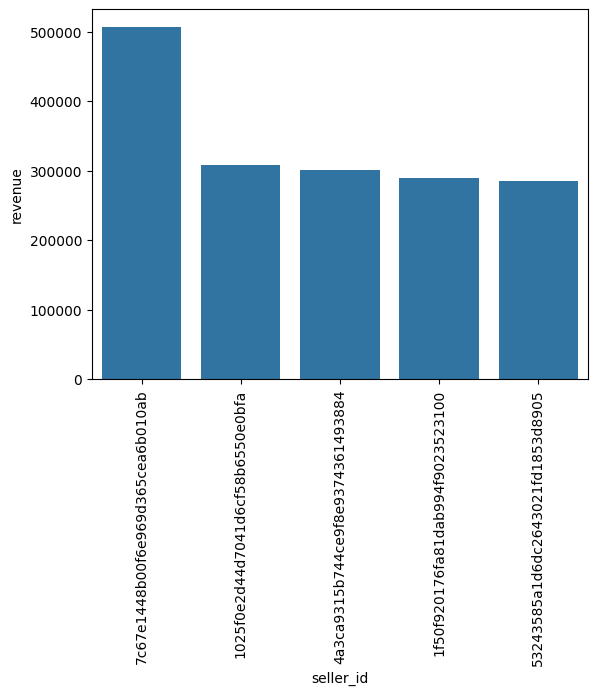

In [77]:
query=""" select *, dense_rank() over(order by revenue desc) from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a

"""
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data, columns=["seller_id", "revenue", "rank"])
df=df.head()
sns.barplot(x= "seller_id", y= "revenue", data=df)
plt.xticks(rotation=90)
plt.show


# Advanced Queries


## 1. Calculate the moving average of order values for each customer over their order history.


In [86]:

query=""" select customer_id, order_purchase_timestamp, payment,
 avg(payment) over(partition by customer_id order by order_purchase_timestamp
 rows between 2 preceding and current row) as mov_avg
 from
 (select orders.customer_id, orders.order_purchase_timestamp,
 payments.payment_value as payment
 from payments join orders
 on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data)
df.head()


,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998


## 2. Calculate the cumulative sales per month for each year.


In [90]:
query=""" select years, months, payment, sum(payment)
 over(order by years, months)cumulative_sales from
 (select year(orders.order_purchase_timestamp) as years,
 month(orders.order_purchase_timestamp) as months,
 round(sum( payments.payment_value),2) as payment from orders join payments
 on orders.order_id = payments.order_id
 group by years, months order by years, months) as a;"""
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data)
df.head()


,0,1,2,3
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78


## 3. Calculate the year-over-year growth rate of total sales.


In [103]:
query=""" with a as (select year(orders.order_purchase_timestamp) as years,
 round(sum( payments.payment_value),2) as payment from orders join payments
 on orders.order_id = payments.order_id
 group by years order by years) 
 
 select years, (payment - lag(payment, 1) over(order by years))/
 lag(payment, 1) over(order by years)* 100 from a
 """
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data, columns=["years","yoy %  growth"])
df


,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


## 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [15]:
query=""" WITH a AS (SELECT customers.customer_id,
           MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers
    JOIN orders
    ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),

b AS (SELECT a.customer_id,
           COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a
    JOIN orders
    ON orders.customer_id = a.customer_id
    AND orders.order_purchase_timestamp > a.first_order
    AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
)

SELECT 100 * (COUNT(DISTINCT a.customer_id) / COUNT(DISTINCT b.customer_id)) AS percentage
FROM a
LEFT JOIN b
ON a.customer_id = b.customer_id;
"""
cur.execute(query)
data=cur.fetchall()

data


[(None,)]

## 5. Identify the top 3 customers who spent the most money in each year.


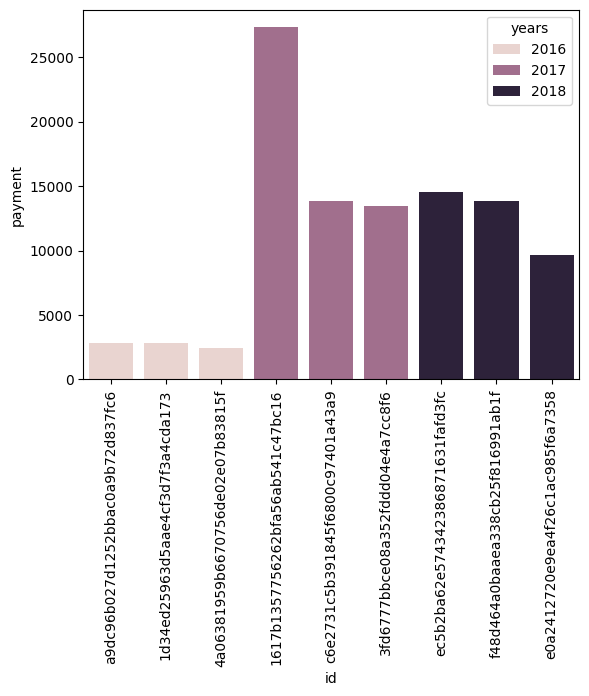

In [20]:
query=""" select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3;"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data, columns=["years","id", "payment", "rank"])
sns.barplot(x="id", y="payment", data=df, hue="years")
plt.xticks(rotation=90)
plt.show()
